В задании требуется найти 'инсайты'. Значит, надо найти закономерности, представляющие ценность с точки зрения информации. Информация - это те знания, которые уменьшают неопределенность в отношении объекта. Буду искать закономерности, уменьшающие эту неопределенность в порядке убывания ценности. 
Взглянув на колонки данных, возникли идеи (в каждой есть какие-то допущения).

1) В наборе данных есть клиенты, которые в определенный момент получили скидку на доставку или сам товар. Имея историю их активности до и после скидки, можно оценить, насколько повлиял факт получения скидки на активность клиентов.

2) По долготе и широте можно проследить динамику изменения 'удаленности' активности от центра города за сутки. Учитывая это, можно сократить издержки на сборщиков и курьеров.

3) Есть время совершения заказа, есть время доставки, но нет времени желаемой доставки. Поэтому можно посмотреть лишь на распределение времени исполнения заказа в общем.




In [232]:
import pandas as pd
import numpy as np

df = pd.read_csv('C:\\Users\\user_PC\\Desktop\\testovoe\\Instamart_data.csv',  header = 0, sep=',')
df.head(50)

,id,created_at,city,lat,lon,item_total,cost,retailer_id,user_id,total_cost,promo_total,total_weight,total_quantity,state,shipped_at,store_id
0,0,2018-08-02 00:01:00,1,55.834381,37.530174,1679,199.0,9,81434.0,190.0,0.0,9745,30,shipped,2018-08-02 08:39:00,30
1,1,2018-08-02 00:09:00,1,55.776063,37.535981,698,299.0,1,NaN,0.0,0.0,500,2,pending,NaN,14
2,2,2018-08-02 00:23:00,1,55.703454,37.467994,1444,299.0,1,30278.0,299.0,0.0,9460,14,canceled,NaN,17
3,3,2018-08-02 00:26:00,1,55.761914,37.565010,1524,299.0,1,103825.0,299.0,0.0,8230,17,shipped,2018-08-07 08:21:00,24
4,4,2018-08-02 00:32:00,1,55.811434,37.496868,9608,299.0,1,9786.0,596.0,0.0,50139,77,shipped,2018-08-02 13:53:00,13
5,5,2018-08-02 00:54:00,1,55.875883,37.708232,968,199.0,9,121896.0,0.0,0.0,3025,8,pending,NaN,51
6,6,2018-08-02 01:15:00,1,55.752345,37.625952,57975,769.0,8,NaN,0.0,0.0,144248,415,pending,NaN,60
7,7,2018-08-02 01:35:00,1,55.825764,37.823080,2678,299.0,1,62196.0,299.0,0.0,11900,12,shipped,2018-08-08 06:53:00,11
8,8,2018-08-02 02:01:00,1,55.723143,37.607453,2201,299.0,1,106374.0,249.0,0.0,1290,4,shipped,2018-08-02 05:30:00,15
9,9,2018-08-02 02:19:00,1,55.744263,37.547345,2375,299.0,8,121897.0,0.0,0.0,14805,15,canceled,NaN,60


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347701 entries, 0 to 347700
Data columns (total 16 columns):
id                347701 non-null int64
created_at        347701 non-null object
city              347701 non-null int64
lat               347679 non-null float64
lon               347679 non-null float64
item_total        347701 non-null int64
cost              347701 non-null float64
retailer_id       347701 non-null int64
user_id           251956 non-null float64
total_cost        347701 non-null float64
promo_total       347701 non-null float64
total_weight      347701 non-null int64
total_quantity    347701 non-null int64
state             347701 non-null object
shipped_at        181031 non-null object
store_id          347701 non-null int64
dtypes: float64(6), int64(7), object(3)
memory usage: 42.4+ MB


айди юзера - флоат!

Обозначения:
id - ... (очевидно)

created_at - Дата принятия заказа Инстамартом (пользователь собрал корзину и сделал заказ)

city - ...

lat - ...

lon - ...

item_total - Сумма позиций в доставке (Сумма имеется в виду в рублях)

cost - Первоначальная стоимость доставки

retailer_id - ...

user_id - ....

total_cost - Стоимость доставки после применения промокода на скидку к доставке (если промокода не было, то cost=total_cost)

promo_total - Промокод на сумму позиций (скидка непосредственно примененная к товарам)

total_weight - Вес заказа , г.

total_quantity - Количество единиц товара

state - состояние доставки

shipped_at - Дата доставки заказа

store_id - ...


In [234]:
print(df.nunique())
print(np.unique(df['state'].values))

id                347701
created_at        211825
city                   3
lat                89416
lon                90550
item_total         18633
cost                 789
retailer_id            6
user_id           104720
total_cost           704
promo_total         8727
total_weight       55680
total_quantity       984
state                  6
shipped_at        130737
store_id              53
dtype: int64
['canceled' 'collecting' 'pending' 'ready' 'shipped' 'shipping']


In [235]:
df[df['user_id'].isnull()].head(10)

,id,created_at,city,lat,lon,item_total,cost,retailer_id,user_id,total_cost,promo_total,total_weight,total_quantity,state,shipped_at,store_id
1,1,2018-08-02 00:09:00,1,55.776063,37.535981,698,299.0,1,NaN,0.0,0.0,500,2,pending,NaN,14
6,6,2018-08-02 01:15:00,1,55.752345,37.625952,57975,769.0,8,NaN,0.0,0.0,144248,415,pending,NaN,60
39,39,2018-08-02 05:45:00,3,56.804756,60.613946,1613,199.0,1,NaN,0.0,0.0,5233,19,pending,NaN,70
49,49,2018-08-02 06:01:00,1,55.618223,37.660830,717,299.0,1,NaN,0.0,0.0,1229,3,pending,NaN,71
54,54,2018-08-02 06:09:00,1,55.650396,37.399405,838,199.0,10,NaN,0.0,0.0,7180,9,pending,NaN,31
62,62,2018-08-02 06:22:00,1,55.869250,37.701142,48793,299.0,1,NaN,0.0,0.0,50146,149,pending,NaN,4
66,66,2018-08-02 06:29:00,1,55.874175,37.550258,1193,299.0,8,NaN,0.0,0.0,2205,6,pending,NaN,60
77,77,2018-08-02 06:36:00,1,55.803761,37.832423,556,299.0,8,NaN,0.0,0.0,0,1,pending,NaN,59
78,78,2018-08-02 06:36:00,1,55.685649,37.367621,1693,299.0,8,NaN,0.0,0.0,1160,2,pending,NaN,9
85,85,2018-08-02 06:47:00,1,55.631627,37.679868,666,199.0,9,NaN,0.0,0.0,1580,6,pending,NaN,52


В условиях задачи не сказано, как воспринимать Nan в used_id (если бы это было не тестовое задание, я бы это выяснил, но в данном случе буду делать гипотезы). Возможно, поскольку у них как раз нет скидок, это и есть новые пользователи, которые пока не получили айди, а может быть нет. Смущает то, что заказ для таких пользователей в ожидании. Посмотрим, что там со статусами их заказов и везде ли нет времени поставки.

In [236]:
print(np.unique(df[df['user_id'].isnull()]['state'].values))
print(False in df[df['user_id'].isnull()]['shipped_at'].isnull().values)


['pending']
False


Похоже, что это все же не новые пользователи. Пока не знаю что, делать с этими фантомами. Как и с другими пустыми значениями. Пока я не стану делать притянутые предположения о значениях на месте NaN. Поэтому удалю все строки с пустыми значениями и обновлю индексы.

In [237]:
df_pure = df.copy()

df_pure.dropna(subset=df_pure.columns, axis=0, inplace=True)
df_pure.reset_index(drop=True, inplace=True)

# исправляю флоат в айди клиентов и за чистый лист возьму df_pure
df_pure.user_id = df_pure.user_id.astype(int) 

# print(df_pure.nunique())
# print(np.unique(df_pure['state'].values))
df_pure['shipped_at_time'] = pd.to_datetime(df_pure['shipped_at'], errors='coerce')
df_pure['created_at_time'] = pd.to_datetime(df_pure['created_at'], errors='coerce')

Удаление всех строк с NaN уничтожило почти 30% пользователей. Затем можно будет вернуться к этим 30%, но пока буду работать с надежными данными.

In [238]:
#найдем множество айди тех клиентов, которые хоть раз совершали заказы без скидки на товар
no_promo = df_pure[(df_pure.promo_total != 0)]['user_id'].values.tolist()
#и средни них найдем подмножество клиентов, которые хоть раз получили скидку. 
got_promo = df_pure[(df_pure.promo_total == 0)]['user_id'].values.tolist()
no_got_promo = [x for x in no_promo if x in got_promo]
print(len(no_got_promo))

9313


Здесь я проверяю первую гипотезу. Для этого я буду считать уровень значимости критерия для отличия средней частоты операций до и после факта получения хотя бы одной скидки. Подчеркиваю, что я исхожу из предположения о том, что все клиенты до момента первой строки датасета не имели никаких скидок, а также не учитываю, сколько скидок они получат в итоге, не учитываю тот факт, что сами клиенты с течением времени могут менять свое поведение и так далее. Чтобы определить частоту операций клиента, нужно хотя бы 2 заказа до скидки и хотя бы 2 заказа после скидки (включая покупку по скидке). Клиентов, которые не совершили минимальное количество операций, нельзя учитывать. По 2 датам уже можно получить оценку среднего времени между покупками для i-го клиента. Набрав список оценок средних активностей (для i от 1 до n), получим распределение по клиентам. Я буду проверять отличие средних двух распределений: до и после скидки. Применив критерий значимости, можно будет принимать решение о принятии/отвержении гипотезы о равенстве средних. 

Также надо учесть, что если человек сделал 2 заказа за 1 час, то скорее всего он что-то забыл и дозаказал. Поэтому такие заказы учитывать не стоит.

Эту идею можно распростанить также на средний чек, среднее количество купленных товаров. Но поскольку все это без дополнительных условий не имеет практической ценности и имеет своей целью лишь демонстрацию умения проверять гипотезы, ограничусь активностью клиентов в зависимости от скидки на доставку.

In [239]:
df_pure_promo1 = df_pure[df_pure.user_id.isin(no_got_promo)]


before_promo_activity_general_list = []
after_promo_activity_general_list = []
for name, group in df_pure_promo1.groupby('user_id'):
    before_promo_activity_list = []
    after_promo_activity_list = []
    # найдем индекс скидки
    for index, row in group.iterrows():
        if row['total_cost'] < row['cost'] :
            index_first_promo = index 
        else:
            continue   
    # формируем списки активности до и после (включая) момент скидки        
    for index, row in group.iterrows():
        if row['total_cost'] >= row['cost'] and index < index_first_promo: 
            before_promo_activity_list += [row.created_at_time]
        else :
            after_promo_activity_list += [row.created_at_time]
    if len(before_promo_activity_list) >=2 and len(after_promo_activity_list) >=2:
        steps_before = [(24 * (i-j).days + (i-j).seconds // 3600) 
                        for i, j in zip(before_promo_activity_list[1:], before_promo_activity_list[:-1])]
        steps_before = [x for x in steps_before if x > 1] # забывчивые клиенты
        
        
        steps_after = [(24 * (i-j).days + (i-j).seconds // 3600) 
                       for i, j in zip(after_promo_activity_list[1:], after_promo_activity_list[:-1])]
        steps_after = [x for x in steps_after if x > 1] # забывчивые клиенты
        
        if len(steps_before) >= 2 and len(steps_after) >= 2:
            before_promo_activity_general_list += [np.mean(steps_before)]
            after_promo_activity_general_list += [np.mean(steps_after)]

In [240]:
print(len(before_promo_activity_general_list))

1178


Text(0, 0.5, 'численность')

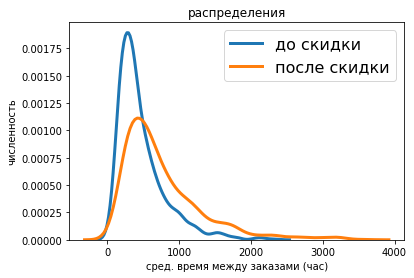

In [241]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.distplot(before_promo_activity_general_list, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'до скидки')

sns.distplot(after_promo_activity_general_list, hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = 'после скидки')

plt.legend(prop={'size': 16}, title = '')
plt.title('распределения')
plt.xlabel('сред. время между заказами (час)')
plt.ylabel('численность')

При виде таких тяжелых хвостов возникает желание назвать эти значения выбросами (особенно зная, что они сильно повлияют на результат стат теста),  но я не стану этого делать, поскольку для этого действие нужно обоснование. Нужен непараметрический критерий. Можно применить бутстреп, и за нулевую гипотезу принять равенство среднего времени между заказами клиентов до и после скидки. Гипотеза двухсторонняя.

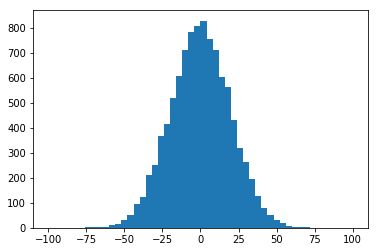

In [242]:
import pylab
np.random.seed(0)

BEFORE = pd.Series(before_promo_activity_general_list) 
AFTER = pd.Series(after_promo_activity_general_list)

def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

def get_random_combinations(n1, n2, max_combinations):
    index = list(range(n1 + n2))
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr
pylab.hist(permutation_zero_dist_ind(BEFORE, AFTER, max_combinations = 10000), 50, range=[-100, 100])
pylab.show()

все ок.

In [243]:
np.random.seed(0)
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)
    
print ("p-value: ", permutation_test(BEFORE, AFTER, max_permutations = 10000, alternative = 'two-sided'))


p-value:  0.0


Итак, можно утверждать, что в рамках перечисленных допущений при применении параметрического критерия с двусторонней гипотезой с очень маленькой ошибкой первого рода (или с высоким уровнем значимости) можно отвергнуть нулевую гипотезу о равных средних периодах между заказами до и после факта получения скидки в пользу уменьшения активности клиентов после скидки. 

В проверенной гипотезе было много допущений. Более корректно было бы проверить изменение среднего времени (по клиентам) между следующим сразу после скидки заказом относительно предыдущего (до скидки) заказа.

Text(0, 0.5, 'численность')

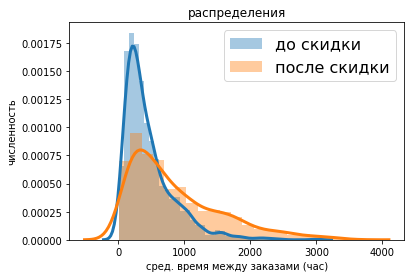

In [244]:
before_promo_activity_general_list = []
after_promo_activity_general_list = []
for name, group in df_pure_promo1.groupby('user_id'):
    before_promo_activity_list = []
    after_promo_activity_list = []
    # найдем индекс скидки
    for index, row in group.iterrows():
        if row['total_cost'] < row['cost'] :
            index_first_promo = index 
        else:
            continue   
    # формируем списки активности до и после (включая) момент скидки        
    for index, row in group.iterrows():
        if row['total_cost'] >= row['cost'] and index < index_first_promo: 
            before_promo_activity_list += [row.created_at_time]
        else :
            after_promo_activity_list += [row.created_at_time]
    if len(before_promo_activity_list) >=2 and len(after_promo_activity_list) >=2:
        steps_before = [(24 * (i-j).days + (i-j).seconds // 3600) 
                        for i, j in zip(before_promo_activity_list[1:], before_promo_activity_list[:-1])]
        steps_before = [x for x in steps_before if x > 1] # забывчивые клиенты
        
        
        steps_after = [(24 * (i-j).days + (i-j).seconds // 3600) 
                       for i, j in zip(after_promo_activity_list[1:], after_promo_activity_list[:-1])]
        steps_after = [x for x in steps_after if x > 1] # забывчивые клиенты
        
        if len(steps_before) >= 2 and len(steps_after) >= 2:
            before_promo_activity_general_list += [np.mean(steps_before[-2:])]
            after_promo_activity_general_list += [np.mean(steps_after[:2])]
            

%matplotlib inline

sns.distplot(before_promo_activity_general_list,
                 kde_kws = {'linewidth': 3},
                 label = 'до скидки')

sns.distplot(after_promo_activity_general_list,
                 kde_kws = {'linewidth': 3},
                 label = 'после скидки')

plt.legend(prop={'size': 16}, title = '')
plt.title('распределения')
plt.xlabel('сред. время между заказами (час)')
plt.ylabel('численность')

In [245]:
print(np.mean(before_promo_activity_general_list), np.mean(after_promo_activity_general_list))
BEFORE = pd.Series(before_promo_activity_general_list) 
AFTER = pd.Series(after_promo_activity_general_list)
print ("p-value: ", permutation_test(BEFORE, AFTER, max_permutations = 10000, alternative = 'two-sided'))

465.62266553480475 865.0649405772496
p-value:  0.0001


Все же скидка на доставку не стимулирует клиентов сделать новый заказ быстрее.

Перехожу к 2 части. Интересует, как изменяется удаленность клиентов в течение дня с точки зрения эффективности использования курьеров. Поэтому сейчас важна не сумма заказов, а только его геометрическое расположение. По долготе и широте можно понять, где какой город (1 - мск) и в некоторых случаях (мск) можно найти координаты центра города, но в общем случае - нельзя. Поэтому учитывая особенность исследуемой закономерности, мерой центра города будет ненормированный на объем покупки центр масс всех заказов в 2d пространстве. Или просто [mean(lat), mean(lon)] по выборке. Удаленность относительно центра - декартово расстояние от центра.  

In [246]:
import datetime
import math

def date_to_hour (datetimestring):
    a = datetime.datetime.strptime(datetimestring, '%Y-%m-%d %H:%M:%S')
    hour_step = a.hour + round(a.minute / 60)
    return(hour_step)

df_pure["created_at_hour"] = df_pure.created_at.apply(lambda x: date_to_hour(x)) 


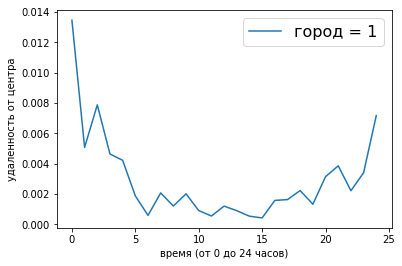

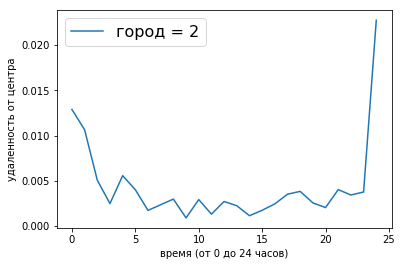

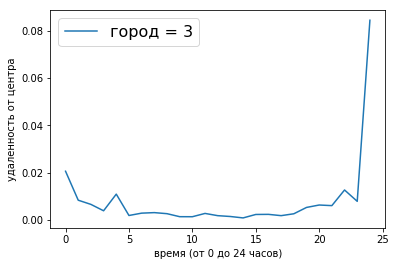

In [247]:
for city, group_city in df_pure.groupby('city'):
    center_lat = group_city['lat'].mean()
    center_lon = group_city['lon'].mean()
    dist_list = []
    for time, group_city_time in group_city.groupby('created_at_hour'):
        dist = math.sqrt((group_city_time['lat'].mean() - center_lat)**2 + 
                         (group_city_time['lon'].mean() - center_lon)**2)
        dist_list += [dist]

    plt.plot(dist_list, label=('город = {}'.format(city)))
    plt.legend(prop={'size': 16}, title = '')
    plt.xlabel('время (от 0 до 24 часов)')
    plt.ylabel('удаленность от центра')  
    plt.show()
    plt.pause(0.5)


В середине дня активность ближе к центру, но ближе к ночи перемещается на окраину во всех 3 городах.

Перехожу к 3 части. Хочу получить зависимости времени исполнения заказа (shipped_at - created_at) в зависимости от того, когда заказ появился.

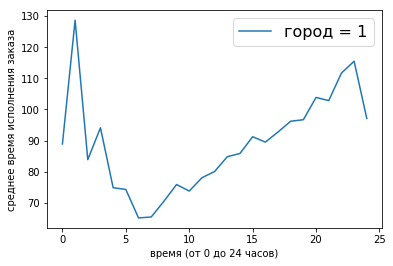

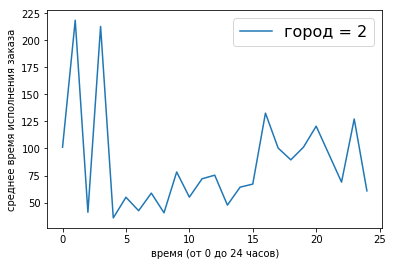

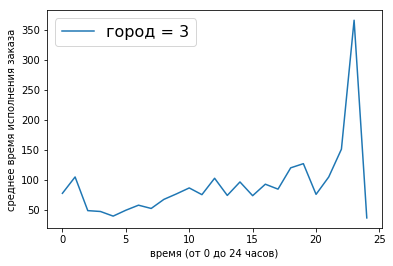

In [248]:
for city, group_city in df_pure.groupby('city'):
    dist_list = []
    for time, group_city_time in group_city.groupby('created_at_hour'):
        dist = ((group_city_time['shipped_at_time'] - group_city_time['created_at_time'])/ pd.Timedelta('1 hour')).mean()        
        dist_list += [dist]
    plt.plot(dist_list, label=('город = {}'.format(city)))

    plt.legend(prop={'size': 16}, title = '')
    plt.xlabel('время (от 0 до 24 часов)')
    plt.ylabel('среднее время исполнения заказа')  
    plt.show()
    plt.pause(0.5)    

В 1 (мск) и 2 городе до 4 часов утра и поздно вечером период выполнения заказа больше, чем в 3-м городе. Также можно сказать, что начиная с 5 утра и до позднего вечера растет время исполнения заказа.